<a href="https://colab.research.google.com/github/nloncomilla/ENAP/blob/main/Regresion_PITCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Cargamos las librerias que se utilizaran en el modelo

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

2) Subimos la base de datos actualizada en PITCH_LR con los datos hasta la fecha a la carpeta de Archivos en Colab

In [139]:
df = pd.read_csv('https://raw.githubusercontent.com/nloncomilla/ENAP/main/LR_PITCH.csv') # Se deberia colocar una direccion de archivo en la nube
df2 = df[len(df)-51:]
df

,Tiempo,Presion(Camara),Temperatura,Reciclo,API,CCN,Rendimiento
0,06-ene-20,0.606831,494.711366,1.089395,5.991823,24.050562,77.044143
1,07-ene-20,0.613278,494.042788,1.108119,5.869815,24.336714,75.889224
2,08-ene-20,0.613278,494.042788,1.108119,5.591276,24.956394,75.889224
3,09-ene-20,0.608766,493.658586,1.133889,5.351488,25.446344,76.977526
4,10-ene-20,0.613282,493.007155,1.069731,5.178977,25.856352,72.573456
...,...,...,...,...,...,...,...
1018,04-feb-23,0.773703,494.264635,1.068345,7.406434,20.974297,84.393917
1019,05-feb-23,1.015667,494.332486,1.065172,7.087349,21.577837,82.702442
1020,06-feb-23,0.755367,494.728291,1.079779,7.087349,21.577837,84.891259
1021,07-feb-23,0.868515,493.656238,1.081718,7.087349,21.577837,83.469067


In [ ]:
df1 = df.drop('Tiempo',axis=1) 
df2 = df2.drop('Tiempo',axis=1) 

0       06-ene-20
1       07-ene-20
2       08-ene-20
3       09-ene-20
4       10-ene-20
          ...    
1018    04-feb-23
1019    05-feb-23
1020    06-feb-23
1021    07-feb-23
1022    08-feb-23
Name: Tiempo, Length: 1023, dtype: object

3) Preparamos las matrices de entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
x=df1.drop('Rendimiento',axis=1)
y=df1['Rendimiento']

x2=df2.drop('Rendimiento',axis=1)
y2=df2['Rendimiento']

4) Regresion Lineal directa

In [ ]:
lm1=LinearRegression()
lm1.fit(x,y)
print("------DF---------")
print(lm1.intercept_)
print(lm1.coef_)
lm4=LinearRegression()
lm4.fit(x2,y2)
print("------DF2---------")
print(lm4.intercept_)
print(lm4.coef_)


------DF---------
115.47541098645816
[-8.3877039   0.09970468  4.51137606 -3.57913195 -2.76451667]
------DF2---------
-572.9126945664401
[-1.75463147  1.23259727 63.01733235 -1.12003145 -0.51519414]


5) Regresion con herramienta Split

In [ ]:
from sklearn.model_selection import train_test_split
X=df1.drop('Rendimiento',axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
print("------------DF---------------")                                            
lm2=LinearRegression().fit(x_train,y_train)
lm2_pred=lm2.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm2_pred)))
print("R*2:",r2_score(y_test,lm2_pred))
print("--------------------------------------------")

X2=df2.drop('Rendimiento',axis=1)
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2,random_state=1)
print("------------DF2---------------")      
lm5=LinearRegression().fit(x2_train,y2_train)
lm5_pred=lm5.predict(x2_test)
print("RMSE:",np.sqrt(mean_squared_error(y2_test,lm5_pred)))
print("R*2:",r2_score(y2_test,lm5_pred))



------------DF---------------
RMSE: 7.047362847846197
R*2: 0.12663904649849467
--------------------------------------------
------------DF2---------------
RMSE: 1.6980312379981661
R*2: 0.4262329052157897


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


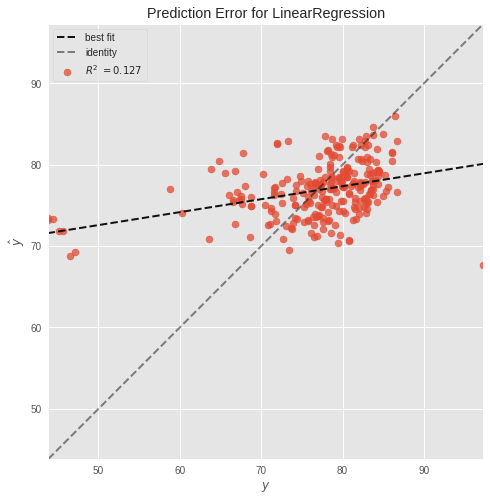

In [ ]:
from yellowbrick.regressor import PredictionError,ResidualsPlot
v=PredictionError(lm2).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


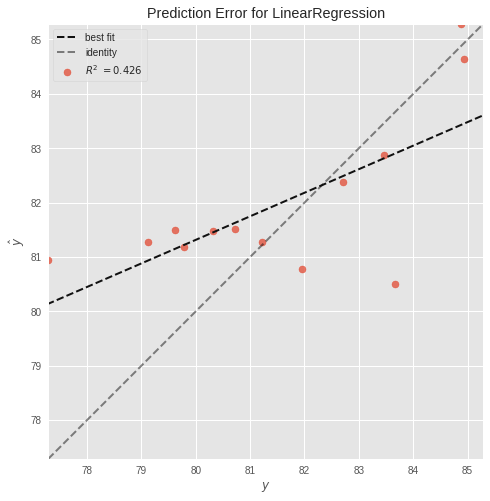

In [ ]:
v=PredictionError(lm5).fit(x2_train,y2_train)
v.score(x2_test,y2_test)
v.poof()

In [ ]:
print("-----------DF-------------------")
print(lm2.coef_)
print(lm2.intercept_)
print("------------DF2-------------------")
print(lm5.coef_)
print(lm5.intercept_)

-----------DF-------------------
[-8.65639867  0.10990317  3.64141059 -3.61110046 -2.80175176]
112.58598131401315
------------DF2-------------------
[-4.57396094  1.47998737 49.8321403  -1.21265444 -0.53241187]
-677.5764630872184


6) Metodo con Interaccion de variables

In [ ]:

df1['interaction1']=df1['Presion(Camara)']*df1['Temperatura']
df1['interaction2']=df1['Temperatura']*df1['Reciclo']
df1['interaction3']=df1['Reciclo']*df1['API']
df1['interaction5']=df1['CCN']*df1['Presion(Camara)']

X=df1[['Presion(Camara)','Temperatura','Reciclo','API','CCN','interaction1','interaction2','interaction3','interaction5']]
y=df1['Rendimiento']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm3=LinearRegression().fit(x_train,y_train)
lm3_pred=lm3.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm3_pred)))
print("R*2:",r2_score(y_test,lm3_pred))


RMSE: 6.8966064791889945
R*2: 0.16360505787514268


In [ ]:
df2['interaction1']=df2['Presion(Camara)']*df2['Temperatura']
df2['interaction2']=df2['Temperatura']*df2['Reciclo']
df2['interaction3']=df2['Reciclo']*df2['API']
df2['interaction5']=df2['CCN']*df2['Presion(Camara)']

X2=df2[['Presion(Camara)','Temperatura','Reciclo','API','CCN','interaction1','interaction2','interaction3','interaction5']]
y2=df2['Rendimiento']
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2,random_state=1)
                                            
lm6=LinearRegression().fit(x2_train,y2_train)
lm6_pred=lm6.predict(x2_test)
print("RMSE:",np.sqrt(mean_squared_error(y2_test,lm6_pred)))
print("R*2:",r2_score(y2_test,lm6_pred))

RMSE: 1.6814867077769415
R*2: 0.43735927485559833


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


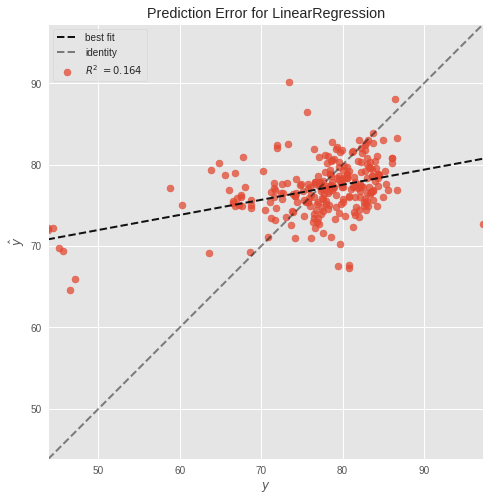

In [ ]:
v=PredictionError(lm3).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


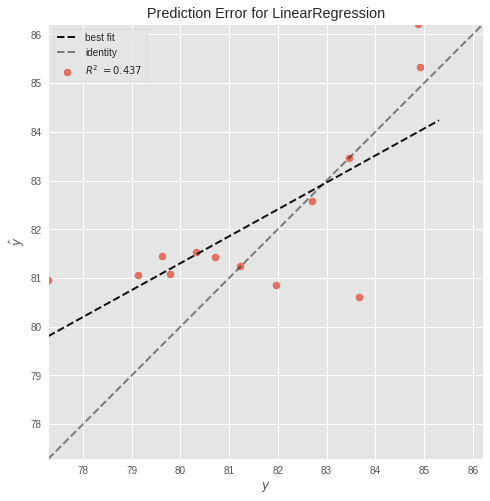

In [ ]:
v=PredictionError(lm6).fit(x2_train,y2_train)
v.score(x2_test,y2_test)
v.poof()

In [ ]:
print(lm3.coef_)
print(lm3.intercept_)

[ 4.74658546e+01  8.49112666e-02 -6.99264877e+01 -1.42933569e+01
 -1.02009219e+00 -7.73842970e-03  2.39127856e-02  1.00141481e+01
 -2.39489271e+00]
151.57452945962922


In [ ]:
print(lm6.coef_)
print(lm6.intercept_)

[ 4.91399982e+00 -1.76194531e+01 -8.54619662e+03  2.50992240e+01
 -2.03559772e+00 -7.87418912e-02  1.78293946e+01 -2.51782737e+01
  1.41736016e+00]
8567.155640697456


7) Ingresar valores actuales del día

In [ ]:
i=0
valores = []
while True:
  try:
    print(df1.columns[i],':')
    dato = float(input(""))
    valores.append(dato)
    print("Valor Guardado")
    if len(valores)<=4:
      i+=1
    else:
      break
  except ValueError:
    if len(valores)<=4:
      print("Dato Incorrecto, ingresa valores numéricos")
    else:
      break
valores1 = np.array((valores[0],valores[1],valores[2],valores[3],valores[4]))
valores3 = np.array((valores[0],valores[1],valores[2],valores[3],valores[4],valores[0]*valores[1],valores[1]*valores[2],valores[2]*valores[3],valores[0]*valores[3]))
nvalores = np.array((str(input("FECHA(dd-mmm-yy):")),valores[0],valores[1],valores[2],valores[3],valores[4],float(input("Rendimiento:"))))

Presion(Camara) :
0.68454746
Valor Guardado
Temperatura :
493.92780828
Valor Guardado
Reciclo :
1.09482356
Valor Guardado
API :
7.5781498
Valor Guardado
CCN :
20.69934082
Valor Guardado
FECHA(dd-mmm-yy):09-feb-23
Rendimiento:84.92546334


In [ ]:
valores1 = valores1.reshape(1,-1)
valores3 = valores3.reshape(1,-1)
valores3

array([[  0.68454746, 493.92780828,   1.09482356,   7.5781498 ,
         20.69934082, 338.11702658, 540.76380144,   8.29673694,
          5.1876032 ]])

8)Predicción del valor diario

In [ ]:
predicted1 = lm1.predict(valores1)
print(predicted1)

[79.57283214]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predicted2 = lm2.predict(valores1)
print(predicted2)

[79.57132463]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predicted3 = lm3.predict(valores3)
print(predicted3)

[100.99326714]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predicted4 = lm4.predict(valores1)
print(predicted4)

[84.54116171]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predicted5 = lm5.predict(valores1)
print(predicted5)

[84.64651195]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predicted6 = lm6.predict(valores3)
print(predicted6)

[72.59678708]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
nvalores

array(['09-feb-23', '0.68454746', '493.92780828', '1.09482356',
       '7.5781498', '20.69934082', '84.92546334'], dtype='<U32')

In [ ]:
nvalores = nvalores.reshape(1,-1)
nvalores

array([['09-feb-23', '0.68454746', '493.92780828', '1.09482356',
        '7.5781498', '20.69934082', '84.92546334']], dtype='<U32')

In [ ]:
print(type(nvalores))
dfn = pd.DataFrame(nvalores, columns = ['Tiempo','Presion(Camara)','Temperatura','Reciclo','API','CNN','Rendimiento'])
dfn

<class 'numpy.ndarray'>


,Tiempo,Presion(Camara),Temperatura,Reciclo,API,CNN,Rendimiento
0,09-feb-23,0.68454746,493.92780828,1.09482356,7.5781498,20.69934082,84.92546334


In [ ]:
dfn = df.append(dfn,ignore_index=True)
dfn

,Tiempo,Presion(Camara),Temperatura,Reciclo,API,CCN,Rendimiento,CNN
0,06-ene-20,0.606831,494.711366,1.089395,5.991823,24.050562,77.044143,NaN
1,07-ene-20,0.613278,494.042788,1.108119,5.869815,24.336714,75.889224,NaN
2,08-ene-20,0.613278,494.042788,1.108119,5.591276,24.956394,75.889224,NaN
3,09-ene-20,0.608766,493.658586,1.133889,5.351488,25.446344,76.977526,NaN
4,10-ene-20,0.613282,493.007155,1.069731,5.178977,25.856352,72.573456,NaN
...,...,...,...,...,...,...,...,...
1019,05-feb-23,1.015667,494.332486,1.065172,7.087349,21.577837,82.702442,NaN
1020,06-feb-23,0.755367,494.728291,1.079779,7.087349,21.577837,84.891259,NaN
1021,07-feb-23,0.868515,493.656238,1.081718,7.087349,21.577837,83.469067,NaN
1022,08-feb-23,0.684547,493.927808,1.094824,7.57815,20.699341,84.925463,NaN
